In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm 
from pymc3 import plot_posterior
import arviz as az

In [2]:
rainfall = pd.read_table("nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
rainfall.head()
rainfall.shape[1]

12

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DEDDF7A48>,
      dtype=object)

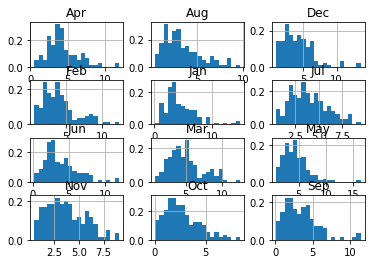

In [3]:
rainfall.hist(normed = True, bins = 20)

# Baysian Simulation 
The function *baysian_rainfall()* takes 5 parameters
1. mu for the mu param of Normal for alpha parameter for gamma
2. sigma for sigma parameter of Normal for alpha prameter of gamma

3. alpha_b for alpha of Beta destribution for the second prameter beta of Gamma
4. beta_b  for beta of Beta destribution for the second prameter beta of Gamma -- This has default value of 1 but was tuned for months where the distributions was a little skewed. 

The function returns sample_posterior_predictive for each month. 

In [4]:
def baysian_rainfall(month, mu, sigma, alpha_b = 1, beta_b = 1):
    import matplotlib.pyplot as plt
    with pm.Model() as rain_model:
        alpha_sept = pm.Normal("alpha_" + month, mu, sigma)
        beta_sept = pm.Beta("beta_" + month, alpha = alpha_b, beta = beta_b)
        
        rainfall[month].fillna(value = rainfall[month].mean(), inplace = True) #taking care of na values 
        
        sept_like = pm.Gamma(month + "_like", alpha = alpha_sept, beta = beta_sept, observed = rainfall[month])
        #map_sept = pm.find_MAP(model = rain_model)
        sept_trace = pm.sample()
        pm.traceplot(sept_trace)
        plot_posterior(sept_trace[100:],color='#87ceeb');
        sept_ppc = pm.sample_posterior_predictive(sept_trace, 1000)
        plt.show()
        az.plot_ppc(az.from_pymc3(posterior_predictive=sept_ppc, model=rain_model))
        del rain_model
    return sept_ppc[month + "_like"] 

# January

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Jan, alpha_Jan]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


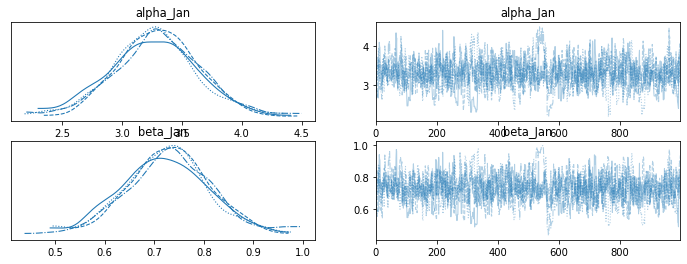

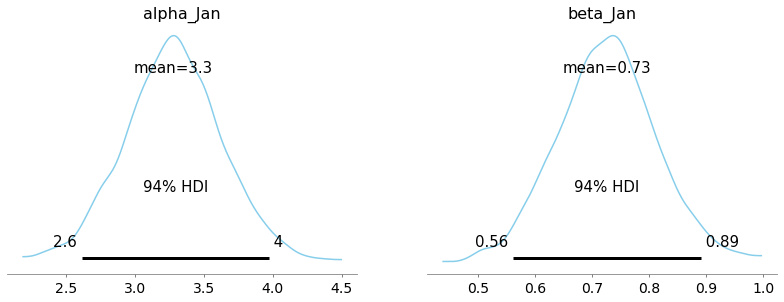

array([[2.35539011, 1.77185813, 5.43668945, ..., 2.27543232, 6.12352745,
        1.33890674],
       [0.50129673, 0.85070406, 3.20500508, ..., 1.40867891, 9.94229645,
        1.84482228],
       [3.6167696 , 3.74425063, 2.97319399, ..., 4.748851  , 1.7334557 ,
        2.79459208],
       ...,
       [3.26293167, 3.7033382 , 2.71376829, ..., 6.79854645, 7.76991412,
        6.43301201],
       [2.06902973, 0.86525589, 5.88950525, ..., 6.11378411, 0.7645166 ,
        2.5143325 ],
       [4.41300561, 5.79082816, 2.78033096, ..., 4.68851716, 4.56208406,
        5.73708436]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


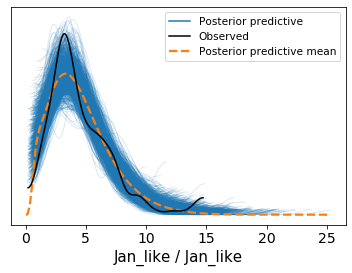

In [5]:
baysian_rainfall("Jan", mu = 3.5, sigma = 1)

# February

For the month of February


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Feb, alpha_Feb]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
The acceptance probability does not match the target. It is 0.7039240778105715, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8995318504779761, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predict

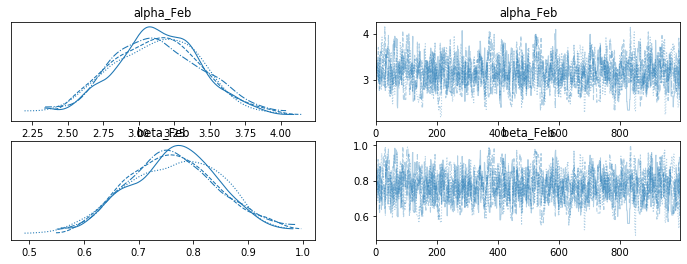

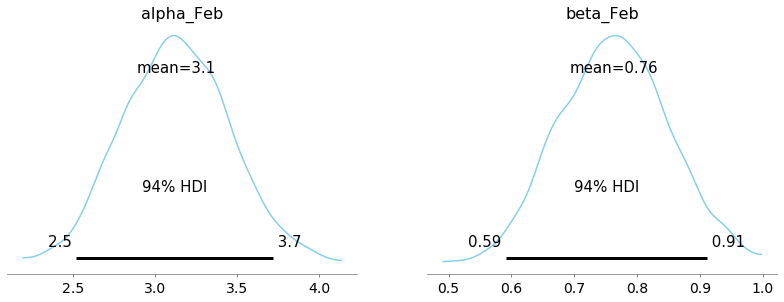

array([[2.96331239, 2.67840501, 7.79606014, ..., 6.77041401, 9.68686455,
        2.50306449],
       [2.90126235, 8.52514232, 4.86123949, ..., 3.67446597, 6.32745891,
        4.03874728],
       [3.14312381, 6.20519961, 2.46752506, ..., 5.1128896 , 3.18080695,
        0.52648124],
       ...,
       [3.16343988, 3.45332631, 1.45786191, ..., 6.33381528, 4.14085939,
        7.79490662],
       [5.09301524, 2.74566507, 4.52443846, ..., 1.3444445 , 2.82121746,
        4.14746532],
       [3.93368684, 1.40050458, 5.85973991, ..., 2.2043458 , 4.3754747 ,
        2.11949981]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


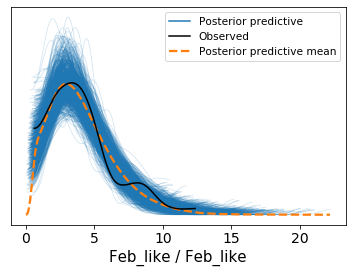

In [6]:
print("For the month of February")
baysian_rainfall("Feb", mu = 3.2, sigma = 1)

# March

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Mar, alpha_Mar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.8812530183666716, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6667274718639602, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws

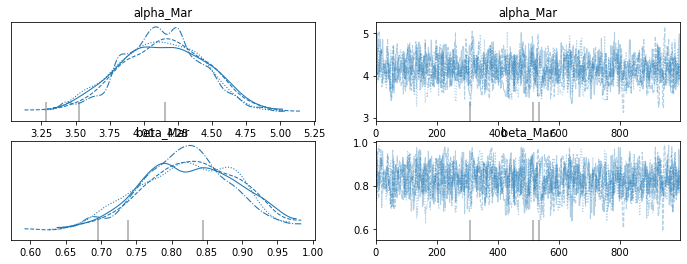

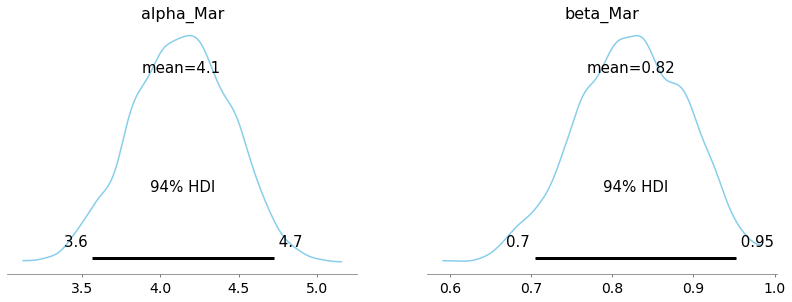

array([[ 4.25135776,  5.10671058,  3.9179877 , ...,  6.65609531,
         2.37726568,  4.51741781],
       [ 6.52168424,  8.48110907,  1.30878301, ...,  6.43243446,
         7.44421935,  4.1352135 ],
       [ 1.93966084,  3.79234152,  5.27656735, ...,  6.94807582,
         5.01115518,  8.92375722],
       ...,
       [11.83242453,  2.59151542,  1.25071566, ...,  2.36242936,
         8.02072492, 11.16511827],
       [ 5.43601098,  3.17028028,  9.07700645, ...,  4.93692327,
         8.70585036, 10.13720093],
       [ 6.90463845,  5.72122707,  8.83022034, ...,  3.6063787 ,
         0.99611523,  7.61820713]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


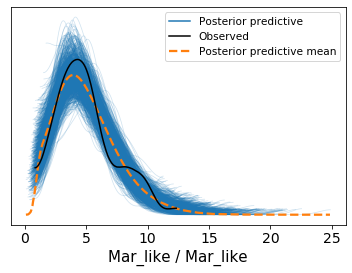

In [7]:
baysian_rainfall("Mar", mu = 4, sigma = 0.5, beta_b = 2)

# April

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Apr, alpha_Apr]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


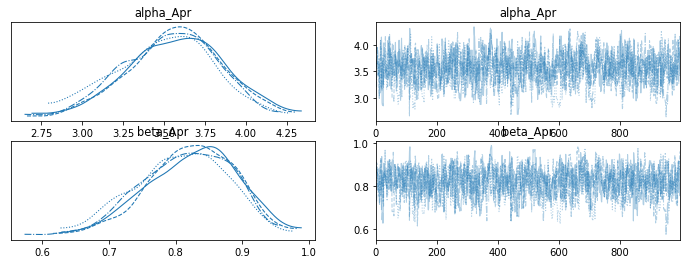

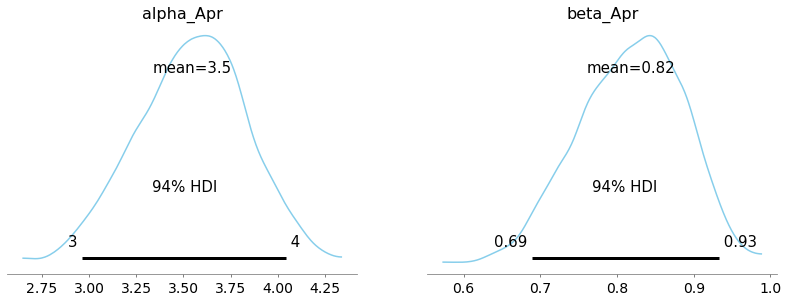

array([[ 9.24455734,  4.65430058,  2.72317528, ...,  3.9811108 ,
         8.0120101 ,  4.84211242],
       [ 4.07446473,  1.92256766,  0.79760338, ...,  2.25341496,
         5.26461091,  1.95877243],
       [ 4.60131371,  5.63352112,  5.23653225, ...,  2.59180706,
         1.59457261,  5.60221355],
       ...,
       [ 4.23383446,  5.61361637,  3.06222627, ...,  3.55018351,
         2.18021473,  1.88157311],
       [ 6.56331203,  4.59553778,  6.09359852, ...,  1.11338128,
        10.2515261 ,  5.50023091],
       [ 5.98365729,  4.09182035,  3.63992441, ...,  4.44746788,
         0.99256732,  1.97272573]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


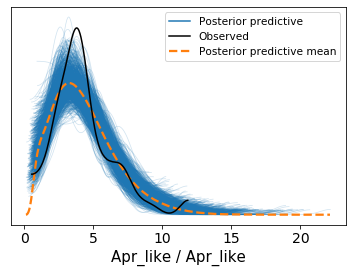

In [8]:
baysian_rainfall("Apr", mu = 4.5, sigma = 1.5, beta_b = 4)

# May

For the month of May


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_May, alpha_May]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


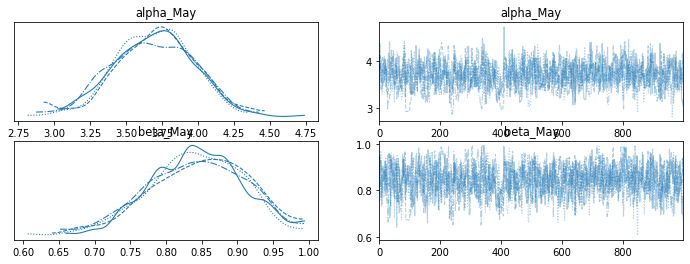

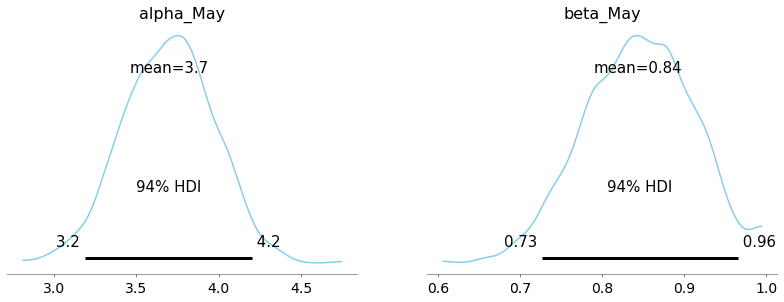

array([[ 1.38802589,  3.02187665,  8.41527425, ...,  3.06279464,
         2.33508326,  6.01227766],
       [ 4.96540767,  3.83315628,  7.2768318 , ..., 10.02568367,
         5.9061071 ,  1.66139722],
       [ 6.01759672,  4.47302529,  3.48874456, ...,  6.29139491,
         0.5021907 ,  4.00497227],
       ...,
       [ 9.96772056,  4.57695529,  5.79348509, ...,  3.30698417,
         3.49054907,  5.3310472 ],
       [ 6.69009815,  5.47339214,  4.50640765, ...,  2.26931744,
         5.36023858,  7.09118718],
       [ 3.44121068, 13.18235502,  3.72709498, ...,  2.41182119,
         1.19012089,  9.39982243]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


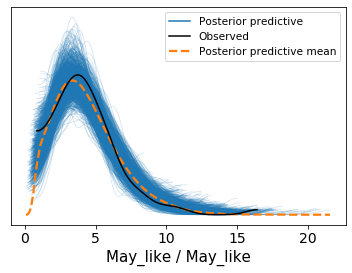

In [9]:
print("For the month of May")
baysian_rainfall("May", mu = 4, sigma = 0.5, beta_b = 2)

# June

For the month of June


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Jun, alpha_Jun]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5718415711163114, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws,

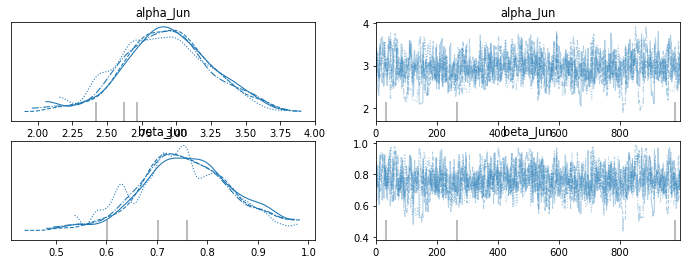

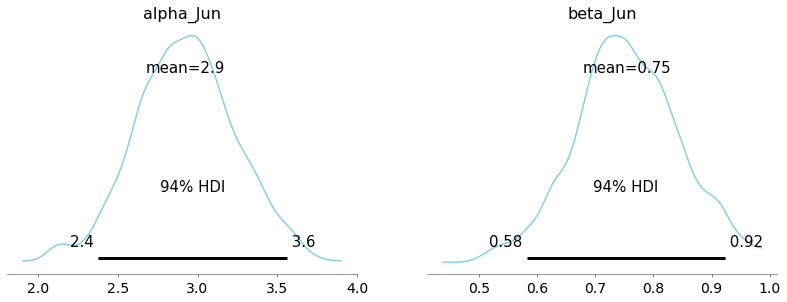

array([[0.52094487, 4.57016358, 2.68208745, ..., 3.535799  , 4.47953586,
        3.39247303],
       [2.59756015, 0.97866462, 1.83297392, ..., 5.87406965, 2.22474751,
        2.94095207],
       [8.33710302, 6.11845628, 7.67112085, ..., 3.52625116, 2.50106416,
        2.1305091 ],
       ...,
       [1.81000893, 2.05043247, 4.92438109, ..., 5.00603551, 1.76160233,
        2.45660964],
       [3.6891634 , 2.80174061, 4.39951893, ..., 5.9153768 , 3.81148291,
        2.83030181],
       [3.89150385, 2.13214955, 5.11274063, ..., 1.06681996, 3.21843224,
        5.74229611]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


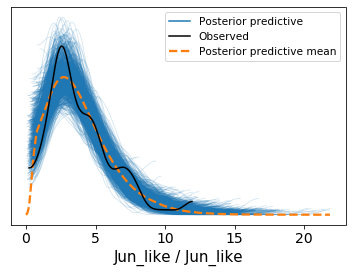

In [10]:
print("For the month of June")
baysian_rainfall("Jun", mu = 3, sigma = 1)

# July

For the month of June


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Jul, alpha_Jul]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


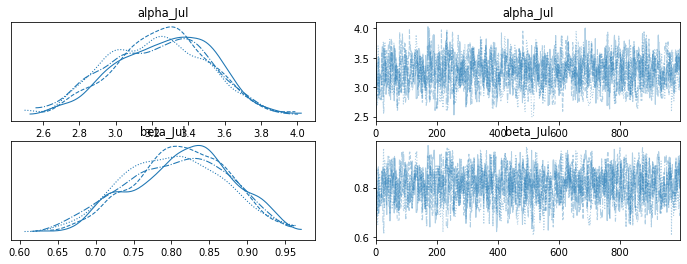

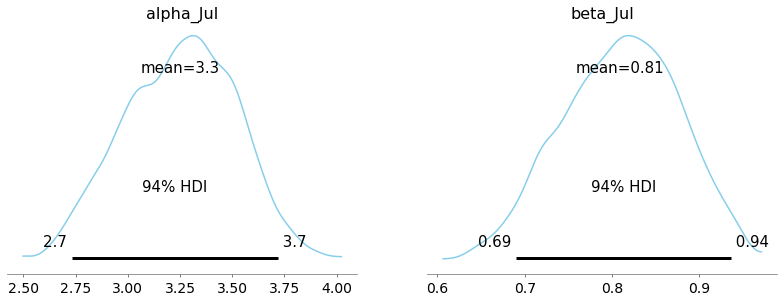

array([[ 5.5644517 ,  3.53276759,  4.07077807, ...,  2.83633803,
         6.05602138,  3.43994042],
       [ 8.38461215,  2.4882359 ,  2.38760579, ...,  2.20381296,
         3.02087314,  3.89600385],
       [ 5.72673044,  1.47799149,  1.01111036, ...,  7.41677294,
         1.98374664,  4.85026607],
       ...,
       [ 3.95140289,  2.10216445, 10.4330994 , ...,  2.30321468,
         5.23794465,  2.4924015 ],
       [ 3.28608213,  2.21580072,  4.28543703, ...,  3.52916187,
         3.240293  ,  3.32250692],
       [ 1.9625815 ,  4.20753467,  8.65480811, ...,  1.85783457,
         1.38003155,  0.9898615 ]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


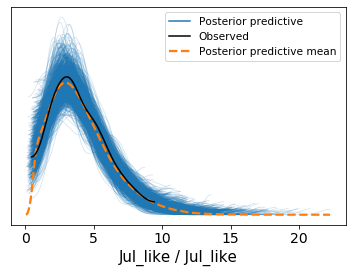

In [11]:
print("For the month of June")
baysian_rainfall("Jul", mu = 5, sigma = 1, beta_b = 4)

# August

For the month of Aug


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Aug, alpha_Aug]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


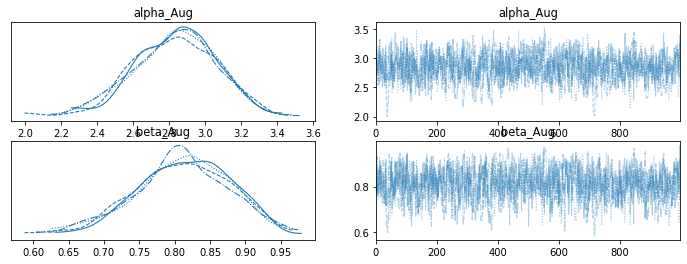

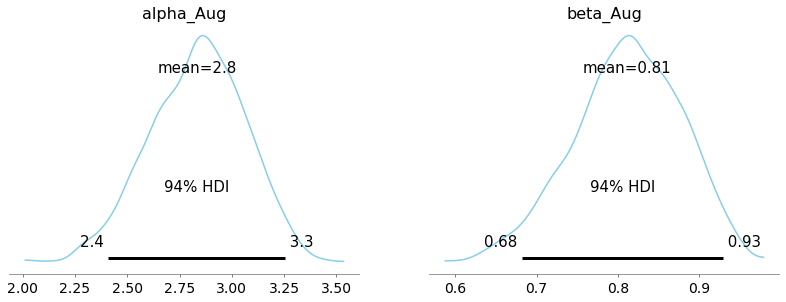

array([[2.00705838, 0.93827818, 4.08270733, ..., 3.60624511, 5.37736826,
        4.22503735],
       [2.31962063, 0.93305595, 2.27625366, ..., 2.42369313, 3.29714328,
        4.57017383],
       [1.22901319, 2.98787925, 2.88349581, ..., 1.97314641, 2.29281656,
        1.17488841],
       ...,
       [4.15835291, 2.82576824, 1.40557025, ..., 7.06581695, 2.51777457,
        9.66092922],
       [3.61934128, 7.39201468, 2.29773672, ..., 7.96514802, 4.80361584,
        2.73592631],
       [2.22329517, 4.11161739, 4.51162002, ..., 1.22513062, 1.3543154 ,
        5.75182051]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


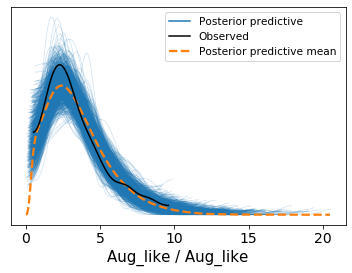

In [12]:
print("For the month of Aug")
baysian_rainfall("Aug", mu = 5, sigma = 1, beta_b = 4)

For the month of Septempber


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Sep, alpha_Sep]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5495575611026343, but should be close to 0.8. Try to increase the number of tuning steps.
There were 86 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.38294954215469545, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6790133588225912, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Plea

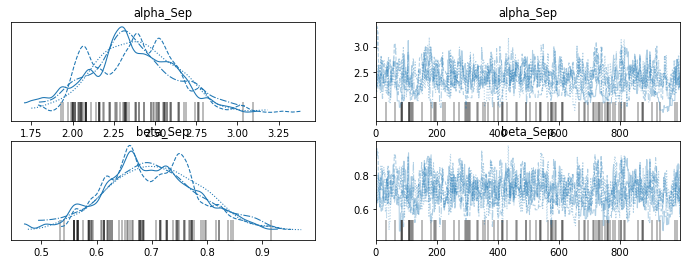

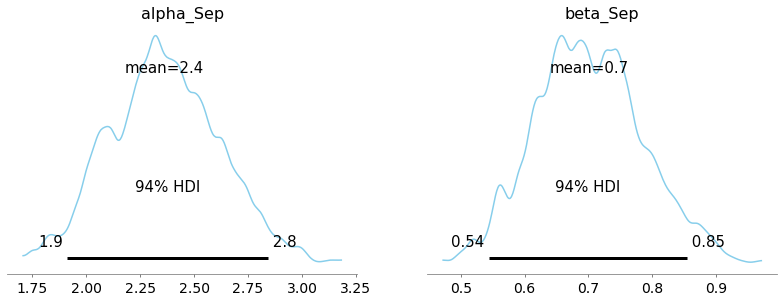

array([[2.57658203, 2.35618474, 0.70552765, ..., 3.06606878, 1.77870024,
        2.34703592],
       [1.85498861, 1.90213626, 4.08071911, ..., 0.80073839, 1.98202714,
        2.56333796],
       [6.64603713, 7.8295664 , 2.53673498, ..., 6.76251497, 5.62579786,
        1.25570559],
       ...,
       [3.02485931, 8.21421199, 4.7276656 , ..., 0.47655172, 1.66513416,
        2.46618085],
       [0.493755  , 0.56837003, 9.75403238, ..., 1.90072474, 0.6432893 ,
        3.57867218],
       [4.20183901, 4.23049892, 3.6969401 , ..., 1.2696691 , 1.69949424,
        4.67116257]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


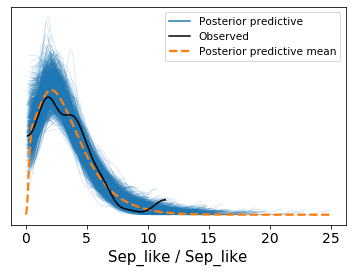

In [13]:
print("For the month of Septempber")
baysian_rainfall("Sep", mu = 5, sigma = 1,)

# October

For the month of October


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Oct, alpha_Oct]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


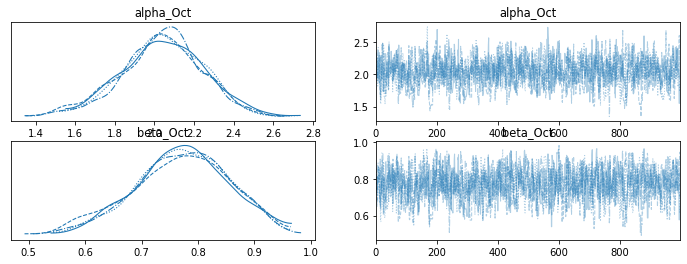

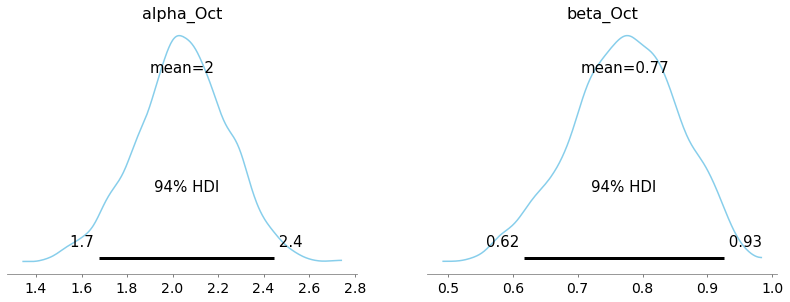

array([[0.59764424, 4.48807724, 0.34909736, ..., 1.58969009, 3.8295598 ,
        8.95907272],
       [1.40352448, 5.24983518, 4.57448156, ..., 7.21535878, 2.51382417,
        2.14302967],
       [3.6401792 , 0.4342899 , 0.78205318, ..., 9.62694194, 5.10190318,
        2.3133713 ],
       ...,
       [1.34796229, 5.27338361, 5.72995628, ..., 0.42910577, 5.69196647,
        3.0702428 ],
       [2.30490253, 1.2712788 , 2.1895835 , ..., 2.63847948, 1.01859059,
        4.59984677],
       [1.20753524, 0.90388634, 0.49665043, ..., 4.79389352, 0.9579255 ,
        4.32762759]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


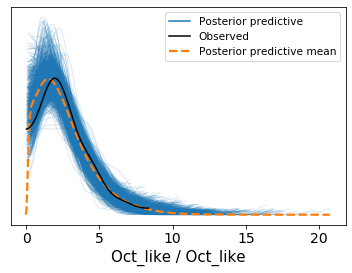

In [14]:
print("For the month of October")
baysian_rainfall("Oct", mu = 5, sigma = 1, beta_b = 2)

# November

For the month of November


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Nov, alpha_Nov]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


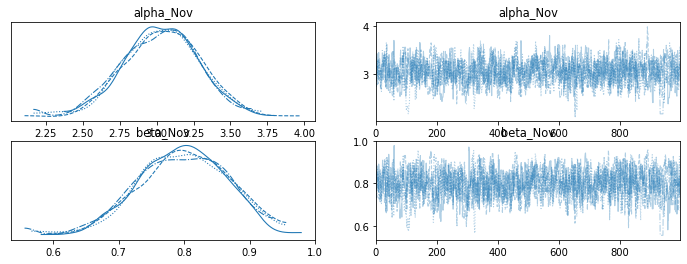

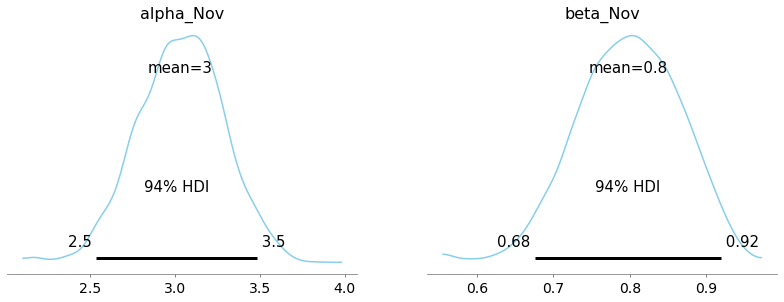

array([[5.64381374, 2.33573304, 0.92121788, ..., 3.69720716, 1.8635067 ,
        5.69406258],
       [3.64111672, 2.77544718, 2.45233174, ..., 2.63471304, 6.89533486,
        5.10961487],
       [5.36417673, 3.8184115 , 4.72362396, ..., 2.60505836, 2.86570491,
        5.18195051],
       ...,
       [4.09440583, 2.37965314, 7.73210056, ..., 7.5553819 , 3.88307537,
        3.54448774],
       [3.64258867, 5.01061424, 7.15850809, ..., 3.27136596, 4.84410718,
        5.15689385],
       [5.4977343 , 4.53514839, 2.17463273, ..., 2.59380068, 1.01053879,
        1.6188334 ]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


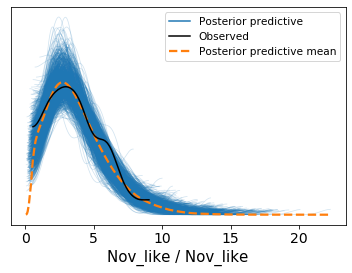

In [15]:
print("For the month of November")
baysian_rainfall("Nov", mu = 5, sigma = 1, beta_b = 4)

# December

For the month of Dec


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\distributions\continuous.py:138: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_Dec, alpha_Dec]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  if sys.path[0] == '':
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\sampling.py:1709: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


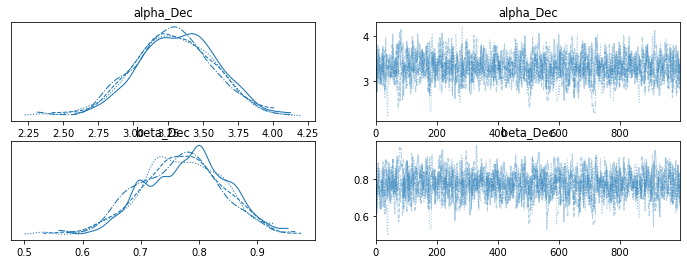

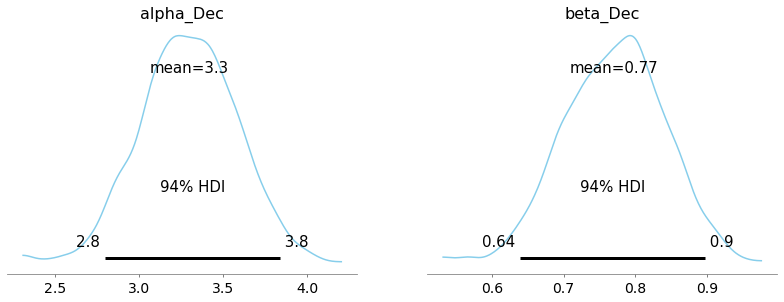

array([[ 5.83347143,  7.94364592,  8.39009189, ...,  8.93582469,
         8.70509449,  3.28474689],
       [ 4.40528839,  5.78857918,  2.62211646, ...,  2.52436767,
         0.99219055,  3.10948255],
       [ 9.75556772,  3.08410638,  5.75356712, ...,  3.22345071,
         2.62419605,  5.78205227],
       ...,
       [ 8.69839669,  4.63137255,  7.01146119, ...,  6.15933679,
         2.04966653,  3.0715244 ],
       [ 7.764014  ,  1.80509782,  3.83897252, ..., 14.01739762,
         4.51925476,  0.29160781],
       [ 1.88836721,  8.49830876,  5.18491648, ...,  4.53324712,
         2.34909144,  1.73436738]])

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


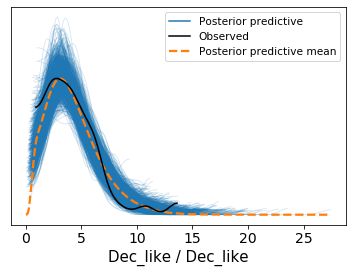

In [16]:
print("For the month of Dec")
baysian_rainfall("Dec", mu = 5, sigma = 1, beta_b = 4)